# Analysing the numpy.random Package

## Introduction

In [39]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

NumPy (shorthand for Numerical Python) is a package used in Python for working with multidimensional arrays and matrices. An array is a data structure that contains a group of elements. Typically these elements are all of the same data type, such as an integer or string. Arrays are commonly used in computer programs to organize data so that a related set of values can be easily sorted or searched. When we add differnet dimensions to these arrays, simple operations such as addition can become quite complex. This library allows us to preform mathematical operations on these complex structures [2]. It also enables arithmetic reading and writing operations on large arrays of data without the need to write for or while loops [1].

These multi dimensional array objects are know as ndarrays in numpy. Ndarrays are fast and flexible containers for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements[1]. NumPy can also be used with other packages such as matplotlib and Pandas to create plots and summarise stastical data.

An important part of any simulation is the ability to generate random numbers. For this reason, NumPy has the random submodule[3]. A random number generator can generate an array of numbers that cannot reasonably predicted better than by random chance. The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions[1]. For example, you can get a 4 × 4 array of samples from the standard normal distribution using normal:

In [2]:
example = np.random.normal(size=(4, 4))
example

array([[ 0.70883589,  1.12508029, -0.3793816 , -0.55864233],
       [ 0.86244044,  0.24445732,  1.67942632, -0.21697942],
       [-0.90900816,  0.58034393,  0.24193795, -0.80888146],
       [-0.76516837, -0.12124185,  0.74700782, -0.43906167]])

Some simple examples of random number generators are rolling a dice, a roulette wheel or coin flipping. Random number generators have a wide range of applications. For example, if you are investigating a system, and you know the statistical properties of this system (eg a binomial distriubtion), you could save alot of time. Instead of collecting sample data, you could simply use numpy.random to generate data that would be similar to the systems distribution. Preforming an experiment using randomly generated data is called a simulation[4]. 

Generally the numpy.random package is used to generate various types and distributions of datasets, which in turn can be used in the development, evaluation and exploration of various libraries and analytical methods[5].

Numpy.random is very fast at generating sample data. In comparsion Python's standard random module will only sample one value at a time. If we look at the benchmark of these numpy.random is much faster for getting large samples[1]. This makes it very useful when we need large samples quickly.

In [3]:
from random import normalvariate
N = 1000000
# looking at built in random speed
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.29 s ± 56.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
# looking at np.random speed
%timeit np.random.normal(size=N)

45 ms ± 990 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Simple Random Data
The sample random data functions are used to generate sequences of random numbers. For example the numpy.random.bytes will give us a number of random bytes in a string format of length 6

In [5]:
np.random.bytes(6)

b'\xfb^\xe2l\x1d\xd2'

In the NumPy simple random functions documentation, there are ten functions listed for Random Sampling. Each of these functions lists different distributions that the data will be spread across; uniform, uniform sample, discrete uniform (additionally between low and high values), continuous uniform and standard normal distributions. 

In uniform distributions samples are evenly spread [9]. In standard normal distributions, there is a central tendancy, in other words the values tend to cluster around the mean, mode and median values [10]. 

Discrete data can only take particular values and can be seperated into classifications. Discrete data can be numeric -- like numbers of apples -- but it can also be categorical -- like red or blue, or male or female, or good or bad [11]. Continuous data has an infinate number of values in a specified range. It is quantitative and therefore can be counted. Continuous data are always essentially numeric [11].

 A good real world example of this would be simulating dice rolls using the randint function. In analysing dicerolls we would assume each face of the dice has an equal chance of occuring. Therefore it makes sense to use the randint function which will give us random integers in a uniform distribution

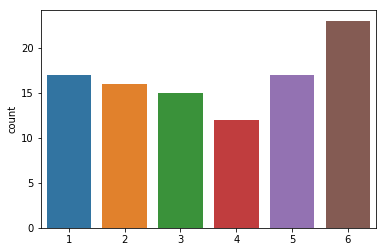

In [6]:
# 100 dice rolls
diceroll = np.random.randint(1, 7 ,size=(100))
# [7]
sns.countplot(diceroll)

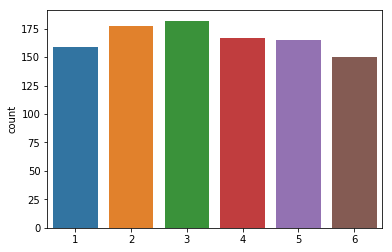

In [7]:
# 1000 dicerolls
diceroll1 = np.random.randint(1, 7 ,size=(1000))
sns.countplot(diceroll1)

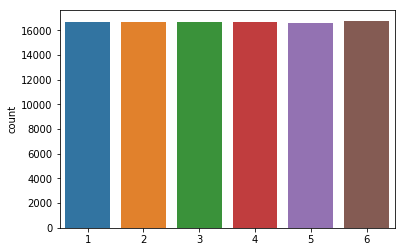

In [8]:
# 100000 dicerolls
diceroll2 = np.random.randint(1, 7, size = (100000))
sns.countplot(diceroll2)

In this example we use randint(1, 7) to generate an array of numbers between 1 and 6. Our size in this example will be the number of times we roll the dice, and the integers correspond to their matching face on the die. Using the plots above with different sample sizes, we can test the distribution of the dataset.

So in this simple example we can see the effect sample size can have on distribution, as the sample size increases the distribution of values becomes more uniform.

## Permutations

The purpose of a permutations function is to arrange a series of numbers or a list [8]. These functions can also be used to change the order of samples in a given range or list. Permutations can either shuffle the dataset by acting on it directly or creating a shuffled copy of the set using the permutation functions in the random package [6].

Thinking about shuffling data, a great real world example of this would be shuffling a deck of cards.

In [9]:
# numbers 1 to 52 each representing a card in a deck
deck = np.arange(1, 53)
deck

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

When we run the permutation function on the deck object, it will rearrange the the order of the deck randomly as seen below:

In [10]:
np.random.permutation(deck)

array([41,  9, 43, 14, 28,  6, 27, 24, 49, 33,  1, 21, 32, 16,  2,  4, 11,
       34,  3, 40, 38,  5, 42, 31, 13, 51, 30, 18, 12, 48, 22,  7, 52, 15,
       45, 17, 26, 47, 10, 37, 50, 39, 19,  8, 25, 20, 35, 46, 29, 36, 44,
       23])

But if we call the original object deck, we see that it remains the same. So the permutation of deck has created a new permuted sequence, but the original object will remain intact.

In [11]:
deck

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

When we run shuffle on deck we see a similar result in that the numbers have been rearranged, however when we call the object we can see the deck object content was permanently shuffled to be in a new random order.

In [12]:
np.random.shuffle(deck)
deck

array([ 2,  5, 52, 28, 15, 33, 19, 27, 29, 37, 49, 43, 14, 44, 21, 16, 48,
        4, 45, 13, 36,  3, 40,  9, 42, 47, 50,  1, 34, 22, 39, 32, 25, 17,
       38, 23, 18, 20, 12,  8, 10, 41,  7, 11, 46, 24, 31, 35, 51, 26, 30,
        6])

## Distributions

### Normal Distribution
A dataset is considered normally distributed when 50% of the values are above the mean and 50% are below the mean [17]. Mathematiclly this means that the mean = median = mode.

The normal distribution (also known as the Gaussian distribution) can be visualised as a what is known as a bell curve. This distribution is considered one of the most common and most important probability distributions in statistics. It is considered to be so important as it fits many natural phenomena [18]. For example, IQ scores, blood pressure and heights all follow a normal distribution.

The probablility of a normal distribution can be mathematically expressed as:

$$ p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }, $$

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\sigma^2,$ is called the variance [3].

The numpy.random.normal() distribtion function will randomly generate values according to this distribution. The parameters  it accepts the mean, standard deviation and number of integers to be returned in the format numpy.random.normal(mean, standard deviation, number of ints)

In [13]:
np.random.normal(0, 1.0, 20)

array([-1.87102288,  0.38059786,  0.90188366, -0.83559821, -0.30068113,
        0.75655834, -0.25427667,  0.22183027, -0.30301434,  1.92833907,
        1.13837157, -0.55888587,  1.51995359, -0.77464108, -0.25310741,
       -0.20614384,  1.64475511, -1.06956236, -1.24101184, -1.0344917 ])

In the above example we are generating 20 random number across a normal distribution. These will be centred around a mean of 0 and have a standard deviation of 1

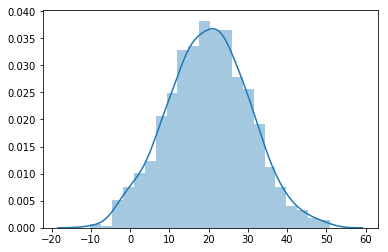

In [26]:
sns.distplot(np.random.normal(20, 10.0, 1000))

In the above plot we can see a histogram of 1000 random numbers, with a mean of 20 and a standard deviation of 10. It is very easy to see the bell curve shape of the normal distribution.

### Binomial Distributions

Binomial distributions give the discrete (whole number) probability distribution for obtaining a number of successes out of a series of trials and can be expressed by the equation [12]:

$$ P(N) = \binom{n}{N}p^N(1-p)^{n-N}, $$

Where P is the probability, and n is the number of successes out of n binomial trials. A binomial trial (or Bernoulli trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted [14]. Looking at the documentation, the random.binomial parameters are: random.binomial(n, p, size=None); where n represents the number of trials, p represents the probability and size represents the size of the set.

Coin tosses are often used to illustate binomial experiments as there are two possible outcomes, either heads or tails. If the desired outcome is heads, and the coin is unbiased (or a fair coin), the probability of tossing the coin and successfully obtaining a heads is 50% or 0.5.

In [15]:
# Toss a coin 10 times, 0.5 means half of the time we expect a head (assuming a fair coin), 
# and then repeat this test 15 times
np.random.binomial(10, 0.5, 15)

array([3, 5, 5, 5, 5, 4, 2, 8, 7, 3, 3, 5, 4, 5, 6])

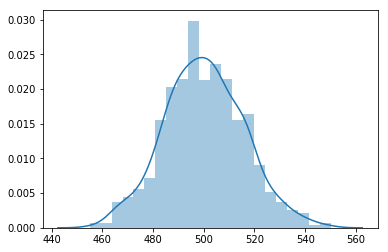

In [16]:
# flip a coin 1000 times and repeat this test 1000 times
sns.distplot(np.random.binomial(1000, 0.5, 1000))

Looking at the results of our coin flipping example above, the result of tests is consistent with our probability of 50% success as can be seen in this distribution of the results. Each value can be calculated as "out of n".

#### Binomial vs Normal Distribution

A binomial distribution is very different from a normal distribution, and yet if the sample size is large enough such as our plots above, the shapes will be quite similar. The key difference is that a binomial distribution is discrete, not continuous. In other words, it is NOT possible to find a data value between any two data values.

Normal Distribution contains the following characteristics [20]:
1. It occurs naturally in numerous situations. 
2. Data points are similar and occur within a small range. 
3. Much fewer outliers on the low and high ends of data range.

The grpah below quite clearly illustrates point 2 and 3. While both distributions are clutsered around the mean, the normal distribution is much more centred meaning a smaller data range and alot less outliers. 

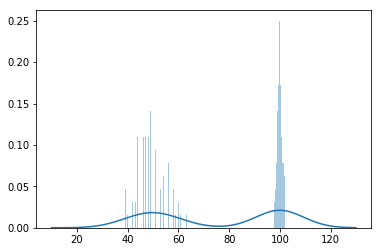

In [21]:
# Graph of binomial and normal distribution side by side
norm = np.random.normal(100, 1, 100)
bi = np.random.binomial(100, .5, 100)
concat = pd.Series(np.concatenate([norm, bi]))
plt.show(sns.distplot(concat, bins = 200))

### Exponential Distribution

The exponential distributuion is often used to describe the time or distance between events (either random or otherwise) [15]. For example, you could describe the time of a meeting at 10am as having an exponential distribution. Some could arrive 10 minutes before the meeting to find their seat and set up. Most should be there by the the start of the meeting at 10am. Then the arrivals should fall - with few arriving after 10am and no one arrving after 10.20am (one would hope!). The equation for exponential distribution is as follows:

$$f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),$$

The NumPy manual states: for $x > 0$ and $0$ elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$. The rate parameter is an alternative, widely used parameterization of the exponential distribution [16].

The numpy.random.exponential function takes two arguements. Firstly scale parameter ($\lambda = 1/\beta$ in our equation). This is the rate at which the events (times as per our example above) will decline [3]. And secondly it will take a size, which is simply the number of events.

In [22]:
np.random.exponential(2, 20)

array([0.32086271, 0.10806118, 4.05175985, 0.0626228 , 1.4165287 ,
       3.54245121, 5.15833561, 1.88249964, 6.20999981, 0.02366069,
       0.26124623, 2.5820362 , 1.42656698, 1.19345431, 0.22113955,
       1.66630568, 1.78077407, 0.51820331, 0.9991805 , 0.24688117])

This example will generate 20 events which will decline at a rate of 2

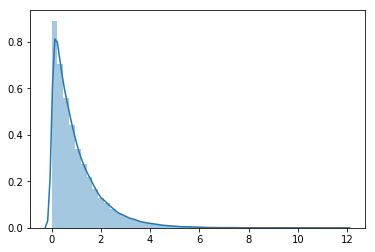

In [23]:
sns.distplot(np.random.exponential(1, 100000))

When we graph the distribution and use a larger sample size, the trialing off characteristic of an exponential distribution can be seen very clearly. This graph shows 100000 events when decline at a rate of 1.

## Chi-square distribution
The chi-square distribution is a special case of the gamma distribution; A chi square distribution with $ k $ degrees of freedom is equal to a gamma distribution with a = $k$ / 2 and b = 0.5 (or β = 2).[21] 

The chi-square test is commonly used to test relationships between categorical variables. The null hypothesis of the Chi-Square test is that there is no relationship between the categorical variables in the population -  they are independent [22]. It essentially measures how well the distribution of data fits with the distribution that would be expected if the variables were independant rather than dependant. 

This test only works for categorical data, such as Gender (men and women) or colour (yellow, orange, red) etc, but not numerical data such as height or weight[23]. An example research question that could be answered using a Chi-Square analysis would be: Is there a significant relationship between gender and choice of pet(ie cat or dog)?

The probability density function of the chi-squared distribution is represented as [3]:

$$ p(x) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}x^{k/2 - 1} e^{-x/2}, $$

Lets look at an example of this. If you were to generate a random sample taken from a normal distribution, then the chi square distribution is the distribution of the sum of these random samples squared. The degrees of freedom $ k $ are equal to the number of samples being summed. 

What this means is that if you have taken 10 samples from the normal distribution, then the degress of freedom would be 10. The degrees of freedom in a chi square distribution is also its mean. 

So, the mean of this particular distribution will be 10. Chi square distributions are always right skewed. However, the greater the degrees of freedom ($ k $), the more the chi square distribution looks like a normal distribution [21].

The numpy.random.chisquare function takes two arguements. Firstly it takes df of degrees of freedom (or $ k $ as our above equation) which must be greater than 0. Secondly it takes a size parameter. Size is simply the number of samples drawn [3].

In [28]:
np.random.chisquare(4, size=10)

array([ 3.65932141,  4.18716083,  2.56660887,  0.76740572, 10.2840426 ,
        1.92943202, 21.3996577 , 10.61140076,  6.44302096, 10.99398745])

The above exmaple shows the use of chisqaured to generate 10 samples with 4 degrees of freedom. Now lets plot a chisquared distribution.

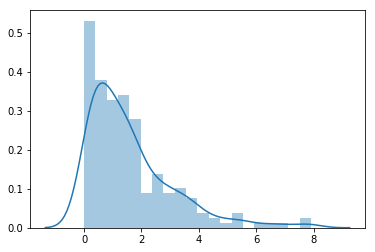

In [50]:
sns.distplot(np.random.chisquare(2, size=200), bins=20)

As stated above, the lower the df is the more skewed the distributon will look. If we increase the df, the distribution should look more normal

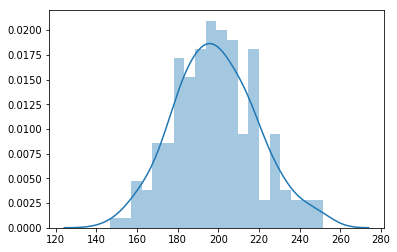

In [52]:
sns.distplot(np.random.chisquare(200, size=200), bins=20)

So increasing the df from 2 to 200 has made the data much more normally distributed. 